In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import PowerTransformer

plt.style.use('fivethirtyeight')

In [2]:
swiggy=pd.read_csv("swiggy_cleaned.csv")
swiggy.shape

(45502, 26)

In [3]:
swiggy.head(4)

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,24,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,33,BANG,25,3,friday,0,5.0,19.0,evening,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,26,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,21,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401


In [4]:
swiggy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45502 entries, 0 to 45501
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              45502 non-null  object 
 1   age                   43648 non-null  float64
 2   ratings               43594 non-null  float64
 3   restaurant_latitude   41872 non-null  float64
 4   restaurant_longitude  41872 non-null  float64
 5   delivery_latitude     41872 non-null  float64
 6   delivery_longitude    41872 non-null  float64
 7   order_date            45502 non-null  object 
 8   weather               44977 non-null  object 
 9   traffic               44992 non-null  object 
 10  vehicle_condition     45502 non-null  int64  
 11  type_of_order         45502 non-null  object 
 12  type_of_vehicle       45502 non-null  object 
 13  multiple_deliveries   44509 non-null  float64
 14  festival              45274 non-null  object 
 15  city_type          

#### Functions  for EDA:

In [5]:
# Function for numerical analysis: (Univariate Analysis)
def numerical_analysis(df,numerical_feature,categorical_feature=None):
    
    fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(10,5))

    # KDE and boxplot for the numerical features:
    sns.kdeplot(x=df[numerical_feature],fill=True,color='purple',ax=ax[0],hue=categorical_feature)
    sns.boxplot(x=df[numerical_feature],color='red',linewidth=0.7,ax=ax[1],hue=categorical_feature)

    # Statistics for the numerical features:
    mean=df[numerical_feature].mean()
    median=df[numerical_feature].median()
    std=df[numerical_feature].std()
    skew=df[numerical_feature].skew()

    stats_text=(
        f"Mean:{round(mean,2)}\n"
        f"Median:{round(median,2)}\n"
        f"Std:{round(std,2)}\n"
        f"skew:{round(skew,2)}"
    )
    
    ax[0].text(
        0.98,0.98,
        stats_text,
        ha='right',
        va='top',
        transform=ax[0].transAxes,
        bbox=dict(facecolor='white', alpha=0.7,edgecolor='black',linewidth=1.5),
        fontsize=10
    )

    plt.tight_layout()
    plt.show()

In [6]:
# Function for numerical and categorical analysis: (Bivariate Analysis
def numerical_categorical_analysis(df:pd.DataFrame,categorical_feature,numerical_feature)->None:
    
    fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(10,5))

    # Stripplot and boxplot:
    sns.stripplot(x=df[categorical_feature],y=df[numerical_feature],color='purple',ax=ax[0],jitter=False)
    sns.boxplot(x=df[categorical_feature],y=df[numerical_feature],color='red',linewidth=0.7,ax=ax[1])

    ax[0].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
    plt.tight_layout()
    plt.show()

In [7]:
#Multivariate Analysis:
def multivariate_analysis(df,num_col,cat_col1,cat_col2):
    fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(16,8))

    # Violin Plot and barplot for the numerical features:
    sns.violinplot(x=df[cat_col1],y=df[num_col],hue=df[cat_col2],color='purple',ax=ax[0])
    sns.barplot(x=df[cat_col1],y=df[num_col],hue=df[cat_col2],color='red',linewidth=0.7,ax=ax[1])

    ax[0].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
    plt.tight_layout()
    plt.show()
    

In [8]:
# Function to check normality:
def normality_check(df,feature,alpha=0.05):
    
    stat,p_value=stats.jarque_bera(df[feature])
    print(f"The p_value is:{p_value}")

    if p_value<=alpha:
        print("Reject Null Hypothesis. The data is not normally distributed")
    else:
        print("Fail to reject Null Hypothesis. The data is normally distributed")

# ANOVA:
def anova_test(df:pd.DataFrame, num_col, cat_col,alpha=0.05):
    data=df.loc[:,[num_col,cat_col]].dropna()

    cat_group=df.groupby(cat_col)
    groups=[group[num_col].values for _,group in cat_group]
    f_stat,p_value=stats.f_oneway(*groups)
    print(p_value)

    if p_value<=alpha:
        print(f"Reject null hypothesis. There is a significant relationship between {num_col} and {cat_col}")
    else:
        print(f"Fail to reject null hypothesis. There is no significant relationship between {num_col} and {cat_col}")

#Chi-Sqaure test:
def chiq_square(df:pd.DataFrame,cat_col1,cat_col2,alpha=0.05):
    data=df.loc[:,[cat_col1,cat_col2]]
    contingency_table=pd.crosstab(data[cat_col1],data[cat_col2])
    test_stats,p_value,_,_=stats.chi2_contingency(contingency_table)
    print(p_value)
    if p_value<alpha:
        print(f"Reject Null Hypothesis. There is significant associaion between {cat_col1} and {cat_col2}")
    else:
        print(f"Fail to reject Null Hypothesis. There is no significant associaion between {cat_col1} and {cat_col2}")


In [9]:
numerical_cols=[cols for cols in swiggy.columns if swiggy[cols].dtype in ['int64','float64']]
numerical_cols

['age',
 'ratings',
 'restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'vehicle_condition',
 'multiple_deliveries',
 'time_taken',
 'order_day',
 'order_month',
 'is_weekend',
 'pickup_time_minutes',
 'order_time_hour',
 'distance']

In [10]:
categorical_cols=[cols for cols in swiggy.columns if swiggy[cols].dtype=='object']
categorical_cols

['rider_id',
 'order_date',
 'weather',
 'traffic',
 'type_of_order',
 'type_of_vehicle',
 'festival',
 'city_type',
 'city_name',
 'order_day_of_week',
 'order_time_of_day']

In [11]:
swiggy[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,43648.0,29.555008,5.761482,20.000000,25.000000,30.000000,35.000000,39.000000
ratings,43594.0,4.635287,0.313827,2.500000,4.500000,4.700000,4.900000,5.000000
restaurant_latitude,41872.0,18.913696,5.467265,9.957144,12.986047,19.065838,22.751234,30.914057
restaurant_longitude,41872.0,76.921664,3.503107,72.768726,73.897902,76.618203,78.368855,88.433452
delivery_latitude,41872.0,18.977356,5.469056,9.967144,13.065996,19.124049,22.820040,31.054057
delivery_longitude,41872.0,76.985325,3.503260,72.778726,73.940327,76.662620,78.405467,88.563452
vehicle_condition,45502.0,1.019406,0.835229,0.000000,0.000000,1.000000,2.000000,3.000000
multiple_deliveries,44509.0,0.744928,0.572488,0.000000,0.000000,1.000000,1.000000,3.000000
time_taken,45502.0,26.297591,9.386419,10.000000,19.000000,26.000000,32.000000,54.000000
order_day,45502.0,13.811657,8.709540,1.000000,6.000000,13.000000,20.000000,31.000000


In [12]:
swiggy[categorical_cols].describe(include='object').T

,count,unique,top,freq
rider_id,45502,1320,PUNERES01DEL01,67
order_date,45502,44,2022-03-15,1190
weather,44977,6,fog,7654
traffic,44992,4,low,15477
type_of_order,45502,4,snack,11512
type_of_vehicle,45502,4,motorcycle,26427
festival,45274,2,no,44380
city_type,44304,3,metropolitian,34029
city_name,45502,22,JAP,3439
order_day_of_week,45502,7,wednesday,7077


#### Inspecting the target column (Time Taken):

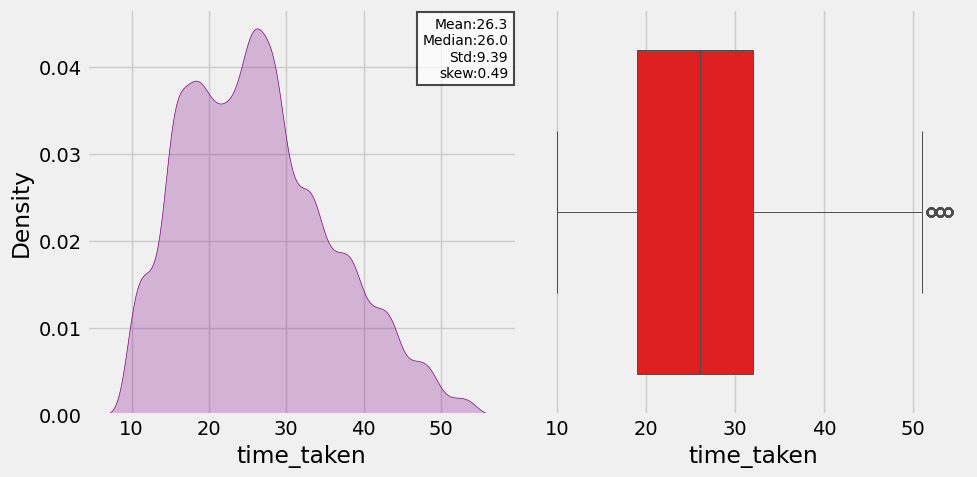

In [13]:
numerical_analysis(swiggy,'time_taken')

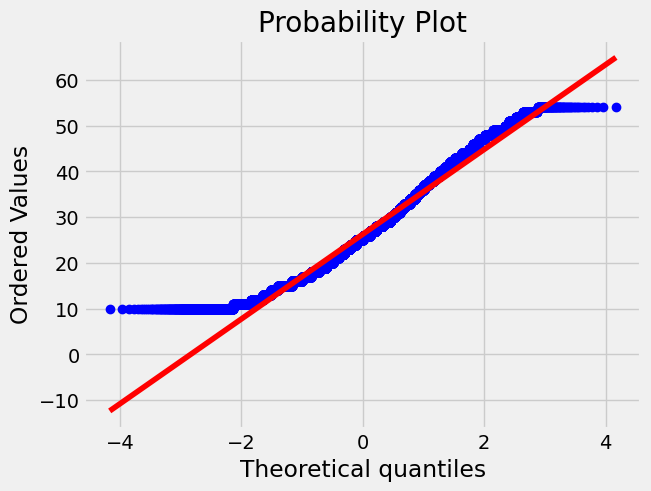

In [14]:
stats.probplot(swiggy['time_taken'],plot=plt)
plt.show()

In [15]:
normality_check(swiggy,'time_taken')

The p_value is:0.0
Reject Null Hypothesis. The data is not normally distributed


In [16]:
box_cox=PowerTransformer()
swiggy['time_taken_pt']=box_cox.fit_transform(swiggy[['time_taken']])

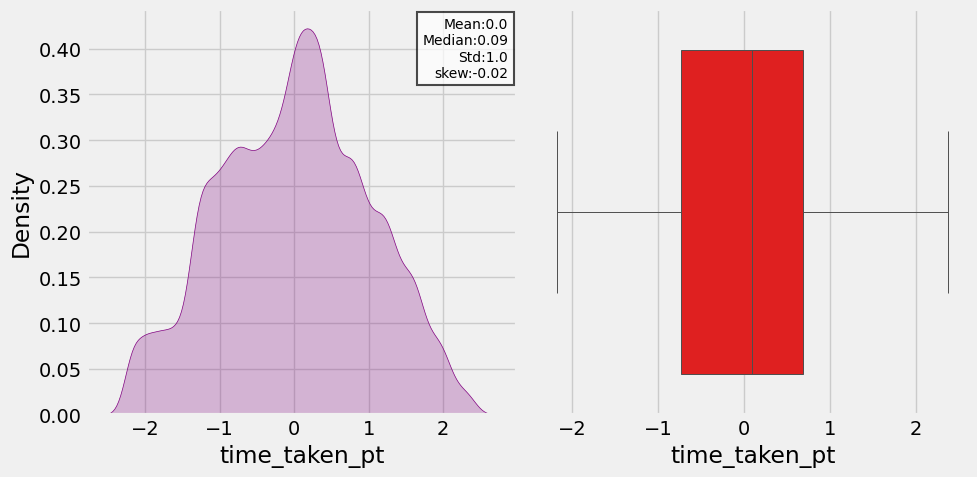

In [17]:
numerical_analysis(swiggy,'time_taken_pt')

**Time Taken** is not normally distributed, but to make it approximately symmetric we used box cox transformation. 

#### Analyzing Age feature:

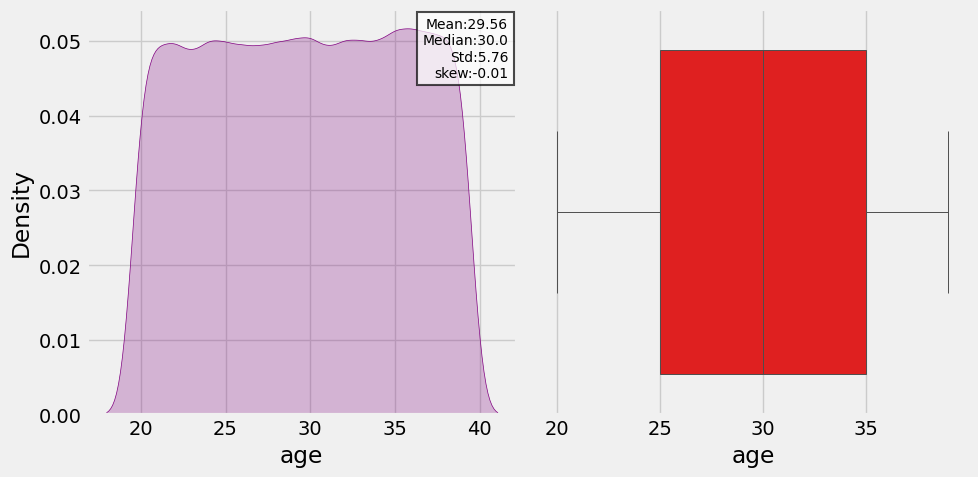

In [18]:
numerical_analysis(swiggy,'age')

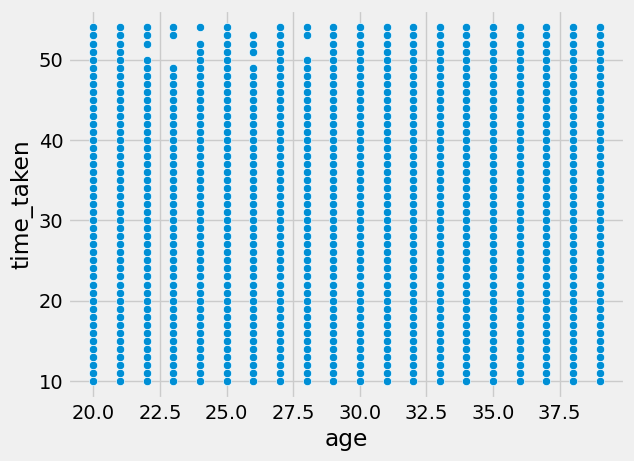

In [19]:
sns.scatterplot(data=swiggy,x='age',y='time_taken')
plt.show()

**Age** approximately has a uniform distribution between the age of people 20 to 40. There is not much variation between the time taken and the ae of the rider. Roughly all drivers take about 10 to 50 min to deliver the food items. 


#### Univariate analysis of numerical features:

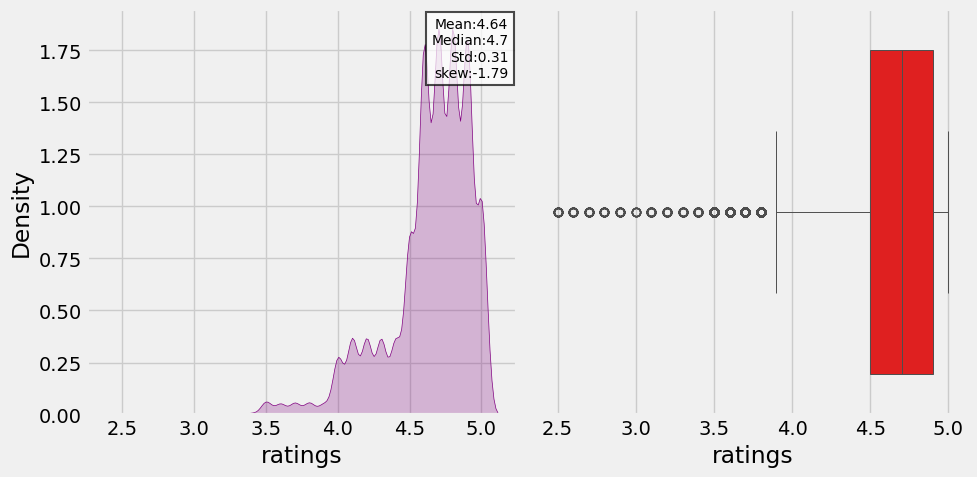

In [20]:
numerical_analysis(swiggy,'ratings')

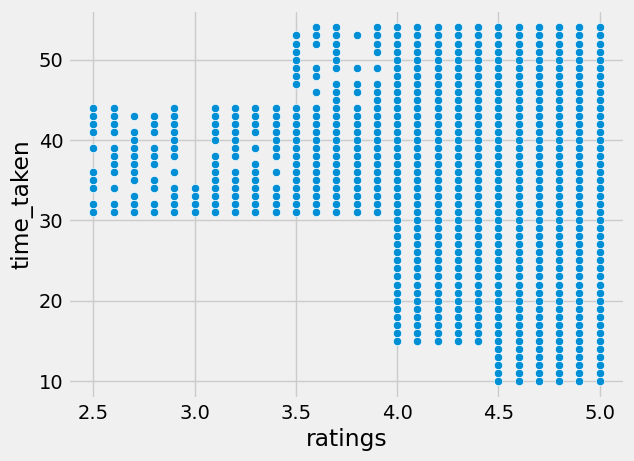

In [21]:
sns.scatterplot(data=swiggy,x='ratings',y='time_taken')
plt.show()

**Rating** follows a left-skewed distribution. Most of the rating is between 4.5 to 5. However, there are some drivers who have received rating less than 4 which is very less. This also shows that usually drivers with higher rating tend to get more delivery orders that range from 10 min to 50 min, whereas drivers with less rating only receive orders for higher time (which might be because we do not have high rating drivers available)

#### Bivarite and Multivariate Analysis:

C:\Users\khadk\AppData\Local\Temp\ipykernel_13732\1377310001.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
C:\Users\khadk\AppData\Local\Temp\ipykernel_13732\1377310001.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


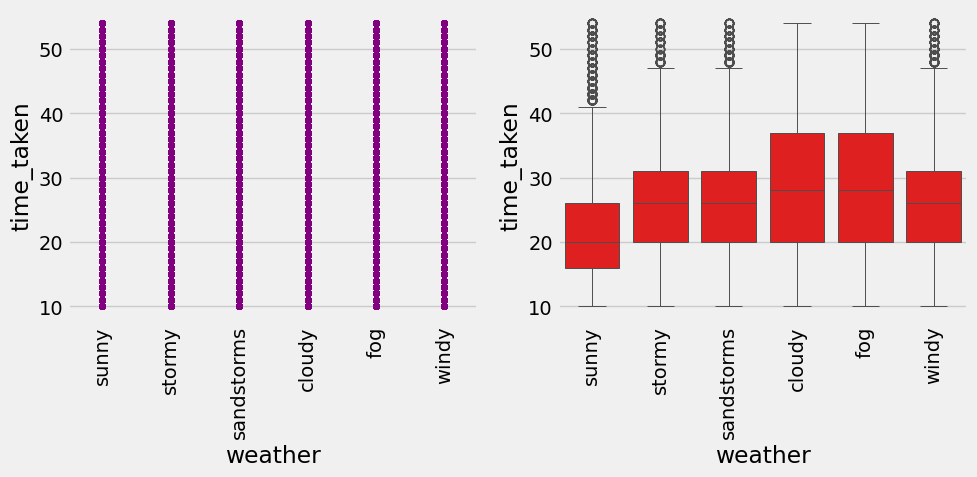

In [22]:
numerical_categorical_analysis(swiggy,'weather','time_taken')

C:\Users\khadk\AppData\Local\Temp\ipykernel_13732\674416604.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.violinplot(x=df[cat_col1],y=df[num_col],hue=df[cat_col2],color='purple',ax=ax[0])
C:\Users\khadk\AppData\Local\Temp\ipykernel_13732\674416604.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(x=df[cat_col1],y=df[num_col],hue=df[cat_col2],color='red',linewidth=0.7,ax=ax[1])
C:\Users\khadk\AppData\Local\Temp\ipykernel_13732\674416604.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
C:\Users\khadk\AppData\Local\Temp\ipykernel_13732\674416604.py:10: UserWarning: set_ticklabels() should only be used with a f

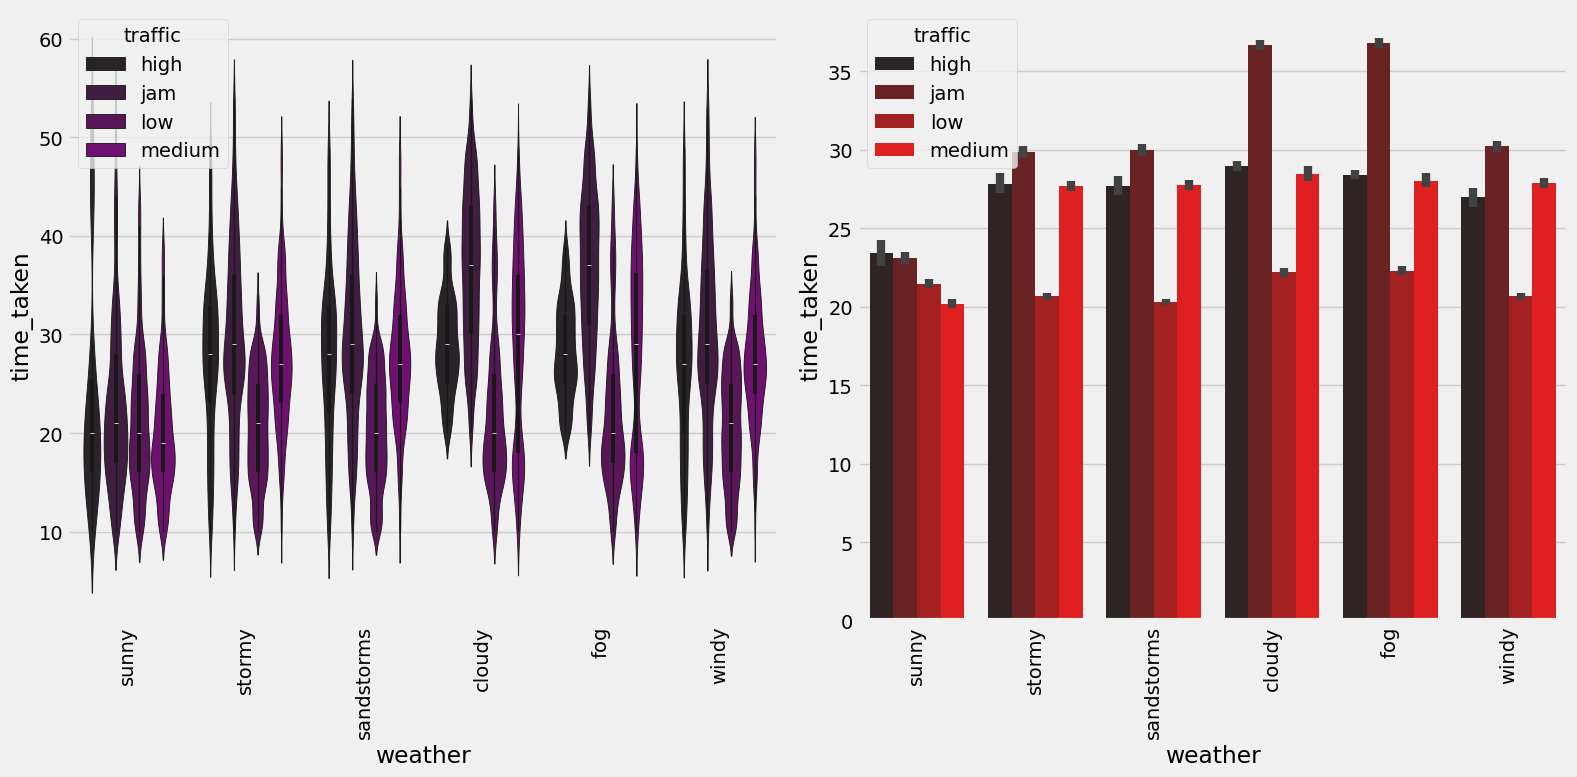

In [23]:
multivariate_analysis(swiggy,'time_taken','weather','traffic')

Cloudy and Foggy days have a higher spread in the time taken for delivery, which means delivery times vary more, with faster and significantly slower deliveries being observed. Also, the median time taken for these two weather conditions is high. This might be the direct result of heavy traffic and visibility problems during these weather conditions. 

C:\Users\khadk\AppData\Local\Temp\ipykernel_13732\1377310001.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
C:\Users\khadk\AppData\Local\Temp\ipykernel_13732\1377310001.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


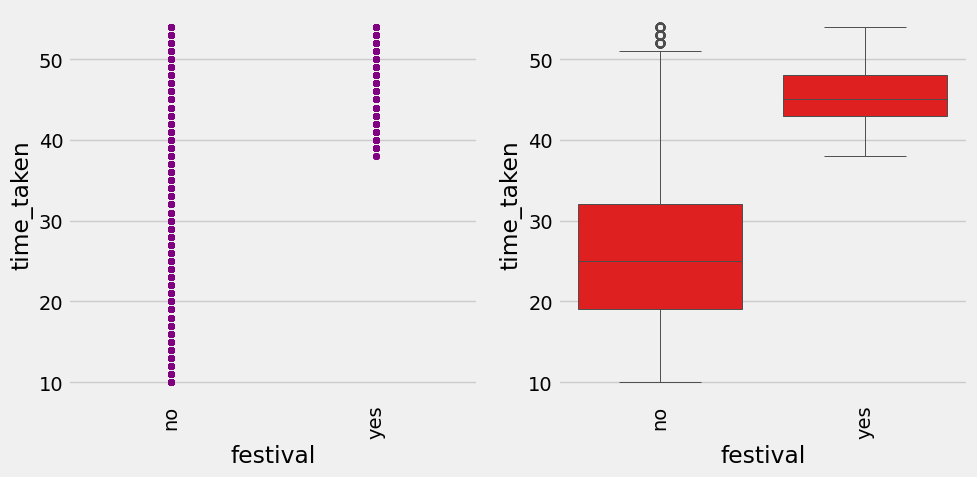

In [24]:
numerical_categorical_analysis(swiggy,'festival','time_taken')

C:\Users\khadk\AppData\Local\Temp\ipykernel_13732\674416604.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.violinplot(x=df[cat_col1],y=df[num_col],hue=df[cat_col2],color='purple',ax=ax[0])
C:\Users\khadk\AppData\Local\Temp\ipykernel_13732\674416604.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(x=df[cat_col1],y=df[num_col],hue=df[cat_col2],color='red',linewidth=0.7,ax=ax[1])
C:\Users\khadk\AppData\Local\Temp\ipykernel_13732\674416604.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
C:\Users\khadk\AppData\Local\Temp\ipykernel_13732\674416604.py:10: UserWarning: set_ticklabels() should only be used with a f

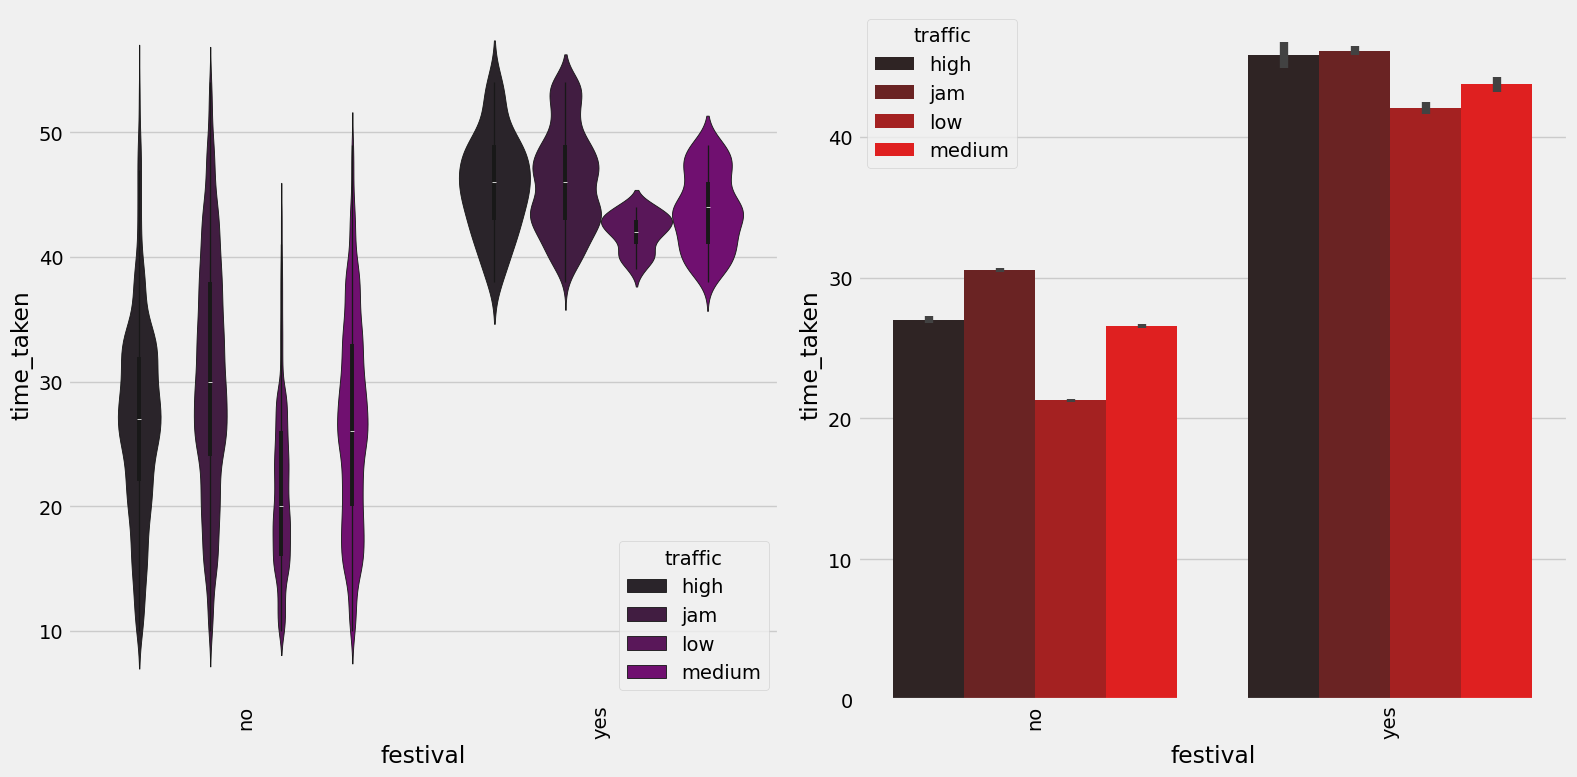

In [25]:
multivariate_analysis(swiggy,'time_taken','festival','traffic')

During normal days the variability in time taken to deliver the food is more spread out, whereas during festivals the spread is between 38 to 55 minutes. The median time for delivery during festivals is also high as more people tend to order from outside (waiting time is higher) along with heavy traffic.  

C:\Users\khadk\AppData\Local\Temp\ipykernel_13732\1377310001.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
C:\Users\khadk\AppData\Local\Temp\ipykernel_13732\1377310001.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


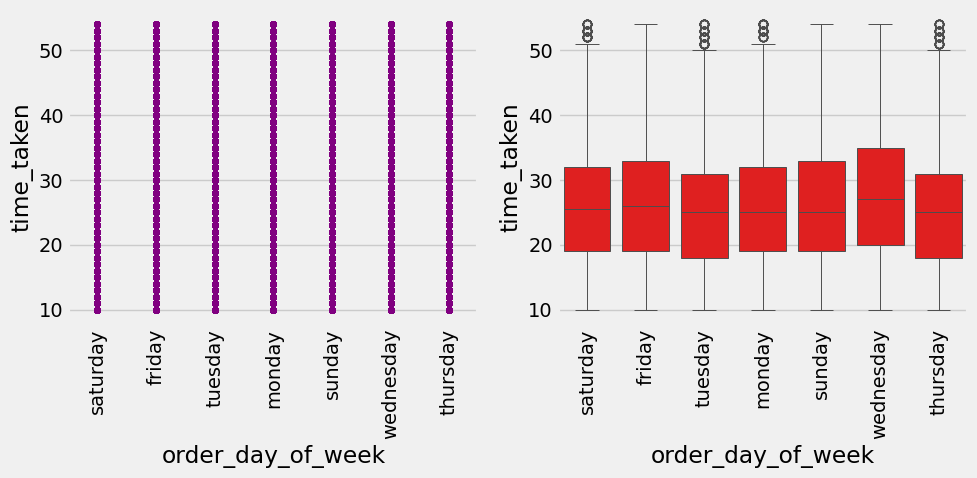

In [26]:
numerical_categorical_analysis(swiggy,'order_day_of_week','time_taken')

C:\Users\khadk\AppData\Local\Temp\ipykernel_13732\1377310001.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
C:\Users\khadk\AppData\Local\Temp\ipykernel_13732\1377310001.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


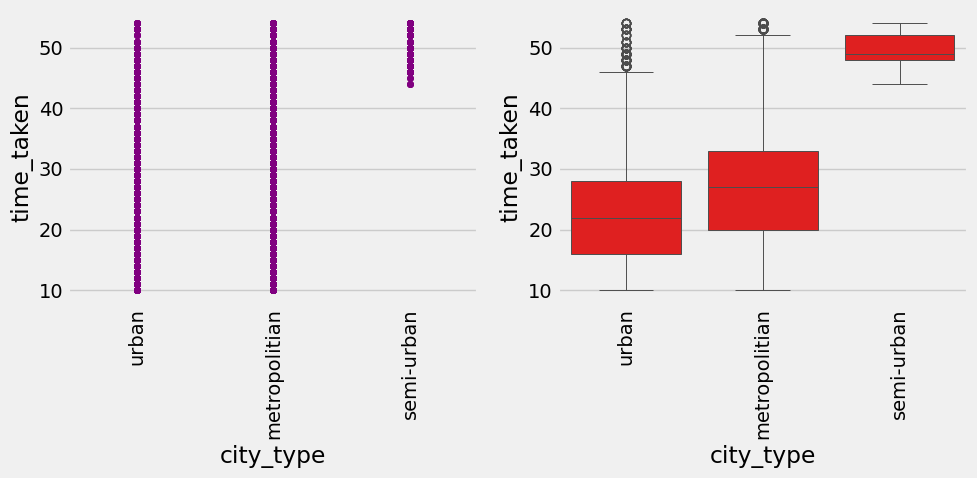

In [27]:
numerical_categorical_analysis(swiggy,'city_type','time_taken')

C:\Users\khadk\AppData\Local\Temp\ipykernel_13732\674416604.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.violinplot(x=df[cat_col1],y=df[num_col],hue=df[cat_col2],color='purple',ax=ax[0])
C:\Users\khadk\AppData\Local\Temp\ipykernel_13732\674416604.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(x=df[cat_col1],y=df[num_col],hue=df[cat_col2],color='red',linewidth=0.7,ax=ax[1])
C:\Users\khadk\AppData\Local\Temp\ipykernel_13732\674416604.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
C:\Users\khadk\AppData\Local\Temp\ipykernel_13732\674416604.py:10: UserWarning: set_ticklabels() should only be used with a f

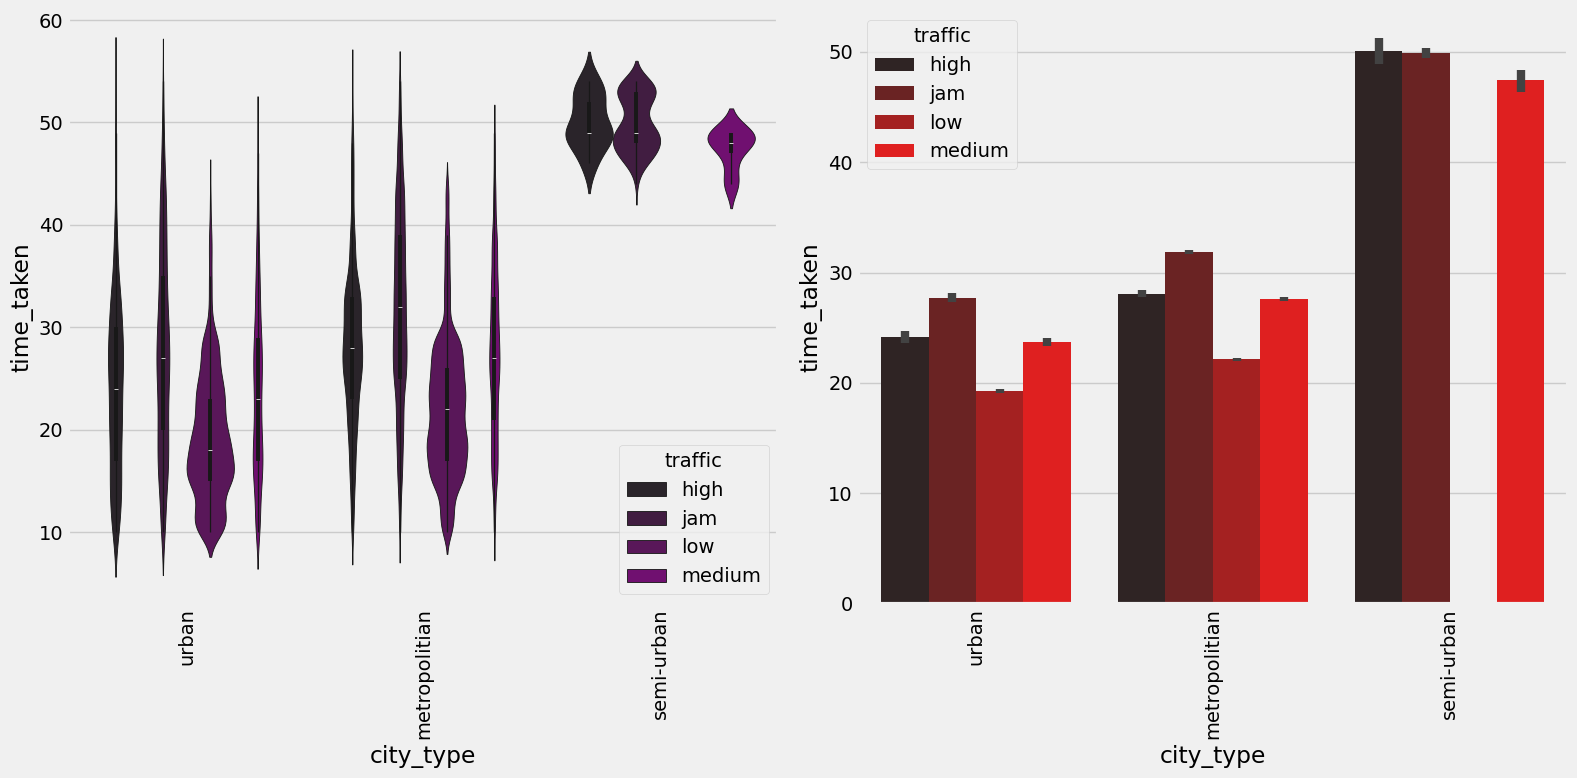

In [28]:
multivariate_analysis(swiggy,'time_taken','city_type','traffic')

The time taken to deliver food in semi-urban areas is higher with riders taking almost above 40 to 55 min to delievery the food. This might be a direct result of resturants being concentrated in urban and metropolitian regions, resulting in longer distance travel and higher traffic. Though, urban and metropolitian have lesser median time, the spread is higher which might be due to higher traffic congestion. 

#### ANOVA Test:

In [29]:
anova_test(swiggy,'time_taken','order_time_of_day')

0.0
Reject null hypothesis. There is a significant relationship between time_taken and order_time_of_day


In [30]:
anova_test(swiggy,'time_taken','weather')

0.0
Reject null hypothesis. There is a significant relationship between time_taken and weather


In [31]:
anova_test(swiggy,'time_taken','traffic')

0.0
Reject null hypothesis. There is a significant relationship between time_taken and traffic


In [32]:
anova_test(swiggy,'time_taken','festival')

0.0
Reject null hypothesis. There is a significant relationship between time_taken and festival


In [33]:
anova_test(swiggy,'time_taken','city_type')

0.0
Reject null hypothesis. There is a significant relationship between time_taken and city_type


In [34]:
anova_test(swiggy,'time_taken','type_of_order')

0.3043309877239704
Fail to reject null hypothesis. There is no significant relationship between time_taken and type_of_order


All the features tested have p-values close to 0, meaning they are statistically significant predictors of delivery time. This implies that at least one category within each feature leads to a different average delivery time. However, ANOVA alone does not identify which categories are driving this difference; for that, we would need post-hoc comparisons.

#### Chi-Square Test:

In [35]:
categorical_cols

['rider_id',
 'order_date',
 'weather',
 'traffic',
 'type_of_order',
 'type_of_vehicle',
 'festival',
 'city_type',
 'city_name',
 'order_day_of_week',
 'order_time_of_day']

In [36]:
chiq_square(swiggy,'type_of_order','traffic')

0.6729576762090983
Fail to reject Null Hypothesis. There is no significant associaion between type_of_order and traffic


In [37]:
chiq_square(swiggy,'festival','traffic')

1.1223471129146869e-153
Reject Null Hypothesis. There is significant associaion between festival and traffic


In [38]:
chiq_square(swiggy,'type_of_order','order_day_of_week')

0.49822431965635827
Fail to reject Null Hypothesis. There is no significant associaion between type_of_order and order_day_of_week
